In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hideblur/HIDE_dataset/Quantity-crowded.txt
/kaggle/input/hideblur/HIDE_dataset/Depth-close-up.txt
/kaggle/input/hideblur/HIDE_dataset/test.txt
/kaggle/input/hideblur/HIDE_dataset/Depth-long-shot.txt
/kaggle/input/hideblur/HIDE_dataset/readme.txt
/kaggle/input/hideblur/HIDE_dataset/Quantity-scattered.txt
/kaggle/input/hideblur/HIDE_dataset/train.txt
/kaggle/input/hideblur/HIDE_dataset/GT/86fromGOPR1093.MP4.png
/kaggle/input/hideblur/HIDE_dataset/GT/63fromGOPR1092.MP4.png
/kaggle/input/hideblur/HIDE_dataset/GT/160fromGOPR1040.MP4.png
/kaggle/input/hideblur/HIDE_dataset/GT/4fromGOPR1033.MP4.png
/kaggle/input/hideblur/HIDE_dataset/GT/202fromGOPR1098.MP4.png
/kaggle/input/hideblur/HIDE_dataset/GT/125fromGOPR1078.MP4.png
/kaggle/input/hideblur/HIDE_dataset/GT/208fromGOPR1081.MP4.png
/kaggle/input/hideblur/HIDE_dataset/GT/89fromGOPR1042.MP4.png
/kaggle/input/hideblur/HIDE_dataset/GT/100fromGOPR1095.MP4.png
/kaggle/input/hideblur/HIDE_dataset/GT/26fromGOPR1030.MP4.png
/kaggle/inp

In [2]:
import os

base_path = '/kaggle/input/hideblur'
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        print(f"Folder: {folder}")
        print(os.listdir(folder_path)[:5]) 

Folder: HIDE_dataset
['Quantity-crowded.txt', 'Depth-close-up.txt', 'test.txt', 'Depth-long-shot.txt', 'readme.txt']


In [11]:
with open('/kaggle/input/hideblur/HIDE_dataset/train.txt', 'r') as f:
    lines = f.readlines()

print(lines[:5])

['100fromGOPR1034.MP4.png\n', '100fromGOPR1037.MP4.png\n', '100fromGOPR1042.MP4.png\n', '100fromGOPR1069.MP4.png\n', '100fromGOPR1072.MP4.png\n']


In [12]:
import os

image_folder = '/kaggle/input/hideblur/HIDE_dataset/train'  # might be named differently
print(os.listdir(image_folder)[:10]) 

['86fromGOPR1093.MP4.png', '63fromGOPR1092.MP4.png', '4fromGOPR1033.MP4.png', '202fromGOPR1098.MP4.png', '125fromGOPR1078.MP4.png', '208fromGOPR1081.MP4.png', '89fromGOPR1042.MP4.png', '100fromGOPR1095.MP4.png', '26fromGOPR1030.MP4.png', '289fromGOPR1093.MP4.png']


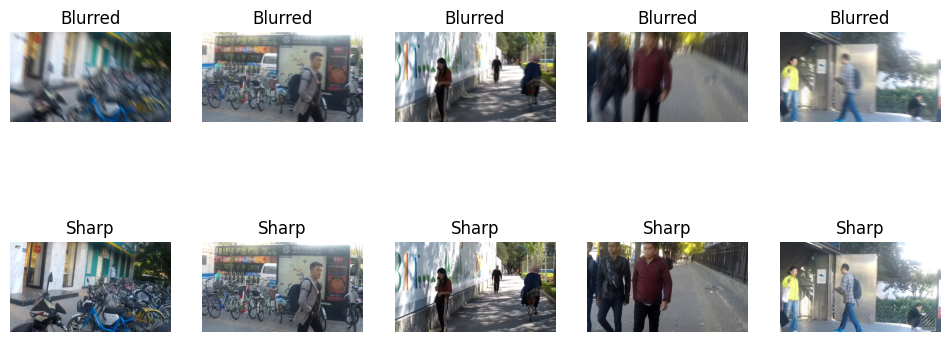

In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Example: visualize first 5 training images
train_folder = '/kaggle/input/hideblur/HIDE_dataset/train'
gt_folder = '/kaggle/input/hideblur/HIDE_dataset/GT'

train_files = os.listdir(train_folder)[:5]

plt.figure(figsize=(12,5))
for i, fname in enumerate(train_files):
    # Blurred image
    blur_img = Image.open(os.path.join(train_folder, fname)).convert('RGB')
    # Corresponding sharp image (assuming same filename in GT/)
    sharp_img = Image.open(os.path.join(gt_folder, fname)).convert('RGB')
    
    # Plot blurred
    plt.subplot(2,5,i+1)
    plt.imshow(blur_img)
    plt.title('Blurred')
    plt.axis('off')
    
    # Plot sharp
    plt.subplot(2,5,i+6)
    plt.imshow(sharp_img)
    plt.title('Sharp')
    plt.axis('off')

plt.show()


In [16]:
import os
from PIL import Image
import numpy as np

# Paths
base_path = '/kaggle/input/hideblur/HIDE_dataset'
train_folder = os.path.join(base_path, 'train')
test_folder = os.path.join(base_path, 'test')
gt_folder = os.path.join(base_path, 'GT')

IMG_SIZE = (128, 128)

def load_images_safe(folder, files, gt_folder=None, size=IMG_SIZE):
    """
    Load images from folder safely:
    - Resize and normalize images
    - If gt_folder is given, also load corresponding ground-truth images
    - Skip files that are missing
    Returns:
        images: np.array of images
        gt_images: np.array of ground-truth images (if gt_folder provided)
    """
    images = []
    gt_images = [] if gt_folder else None

    for fname in files:
        fname = fname.strip()
        img_path = os.path.join(folder, fname)
        
        if not os.path.exists(img_path):
            print(f"Warning: {img_path} not found, skipping.")
            continue
        
        img = Image.open(img_path).convert('RGB')
        img = img.resize(size)
        img_array = np.array(img) / 255.0
        images.append(img_array)
        
        if gt_folder:
            gt_path = os.path.join(gt_folder, fname)
            if not os.path.exists(gt_path):
                print(f"Warning: {gt_path} not found, skipping GT for this file.")
                # Remove last added blurred image to keep alignment
                images.pop()
                continue
            gt_img = Image.open(gt_path).convert('RGB')
            gt_img = gt_img.resize(size)
            gt_array = np.array(gt_img) / 255.0
            gt_images.append(gt_array)
    
    if gt_folder:
        return np.array(images, dtype=np.float32), np.array(gt_images, dtype=np.float32)
    else:
        return np.array(images, dtype=np.float32)

# -------------------------------
# Read train.txt and test.txt
# -------------------------------
with open(os.path.join(base_path, 'train.txt'), 'r') as f:
    train_files = f.readlines()

with open(os.path.join(base_path, 'test.txt'), 'r') as f:
    test_files = f.readlines()

# -------------------------------
# Load training images safely
# -------------------------------
X_train, y_train = load_images_safe(train_folder, train_files, gt_folder=gt_folder)
X_test, y_test = load_images_safe(test_folder, test_files, gt_folder=gt_folder)

In [17]:
# -------------------------------
# Optional: validation split
# -------------------------------
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

# -------------------------------
# Check shapes
# -------------------------------
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (5757, 128, 128, 3) y_train: (5757, 128, 128, 3)
X_val: (640, 128, 128, 3) y_val: (640, 128, 128, 3)
X_test: (0,) y_test: (0,)


In [18]:
import os
test_files_listed = os.listdir('/kaggle/input/hideblur/HIDE_dataset/test')
print(len(test_files_listed), test_files_listed[:10])

4 ['test-close-ups', 'near.txt', 'test-long-shot', 'far.txt']


In [19]:
import os

test_folder = '/kaggle/input/hideblur/HIDE_dataset/test'
test_images = []

for root, dirs, files in os.walk(test_folder):
    for f in files:
        if f.endswith('.png'):
            test_images.append(os.path.join(root, f))

print("Number of test images found:", len(test_images))
print(test_images[:10])

Number of test images found: 2025
['/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/160fromGOPR1040.MP4.png', '/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/259fromGOPR1089.MP4.png', '/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/12fromGOPR0955.png', '/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/4fromGOPR0955.png', '/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/148fromGOPR1096.MP4.png', '/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/112fromGOPR1087.MP4.png', '/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/123fromGOPR1096.MP4.png', '/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/87fromGOPR1038.MP4.png', '/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/276fromGOPR1087.MP4.png', '/kaggle/input/hideblur/HIDE_dataset/test/test-close-ups/179fromGOPR0955.png']


In [20]:
import os
from PIL import Image
import numpy as np

# Paths
test_folder = '/kaggle/input/hideblur/HIDE_dataset/test'
gt_folder = '/kaggle/input/hideblur/HIDE_dataset/GT'
IMG_SIZE = (128, 128)

def load_test_images(test_folder, gt_folder, size=IMG_SIZE):
    images = []
    gt_images = []

    for root, dirs, files in os.walk(test_folder):
        for fname in files:
            if not fname.endswith('.png'):
                continue
            img_path = os.path.join(root, fname)
            if not os.path.exists(img_path):
                print(f"Warning: {img_path} not found, skipping.")
                continue
            
            # Load blurred image
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            img_array = np.array(img) / 255.0
            images.append(img_array)
            
            # Load corresponding GT image
            gt_path = os.path.join(gt_folder, fname)
            if not os.path.exists(gt_path):
                print(f"Warning: GT {gt_path} not found, skipping this image.")
                images.pop()  # Remove last blurred image to keep alignment
                continue
            
            gt_img = Image.open(gt_path).convert('RGB')
            gt_img = gt_img.resize(size)
            gt_array = np.array(gt_img) / 255.0
            gt_images.append(gt_array)

    return np.array(images, dtype=np.float32), np.array(gt_images, dtype=np.float32)

# Load test images safely
X_test, y_test = load_test_images(test_folder, gt_folder)

print("Test images loaded:", X_test.shape)
print("Test GT images loaded:", y_test.shape)


Test images loaded: (2025, 128, 128, 3)
Test GT images loaded: (2025, 128, 128, 3)


In [21]:
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (5757, 128, 128, 3) y_train: (5757, 128, 128, 3)
X_val: (640, 128, 128, 3) y_val: (640, 128, 128, 3)
X_test: (2025, 128, 128, 3) y_test: (2025, 128, 128, 3)
